In [20]:
import warnings
warnings.filterwarnings('ignore')

In [27]:
import pandas as pd

In [28]:
dataset = pd.read_excel("/content/fake_news.xlsx")
dataset.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [29]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20800 entries, 0 to 20799
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      20800 non-null  int64 
 1   title   20242 non-null  object
 2   author  18843 non-null  object
 3   text    20757 non-null  object
 4   label   20800 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 812.6+ KB


In [30]:
dataset['label'].value_counts() # 0: reliable, 1: unreliable

,count
label,
1,10413
0,10387


In [31]:
import matplotlib.pyplot as plt

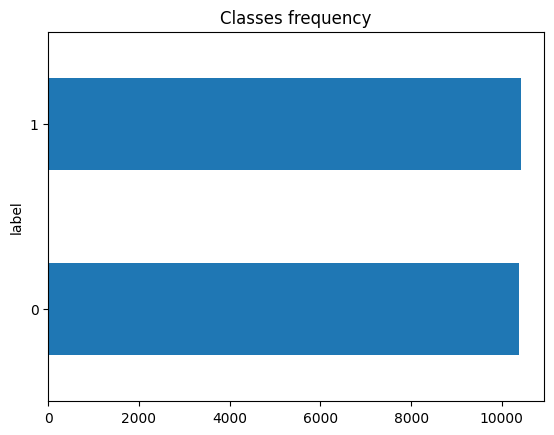

In [32]:
label_count = dataset['label'].value_counts(ascending=True)
label_count.plot.barh()
plt.title("Classes frequency")
plt.show()

In [33]:
import nltk
from nltk.corpus import stopwords
import re
nltk.download('stopwords')
en_sw = stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [34]:
dataset['title'] = dataset['title'].astype(str)
dataset['title'] = dataset['title'].str.lower()
dataset['title'] = dataset.apply(lambda x: re.sub(r"([^\s\w])", "", x['title']), axis=1)
dataset['title'] = dataset['title'].apply(lambda x: ' '.join([word for word in x.split() if word not in (en_sw)]))

dataset['text'] = dataset['text'].astype(str)
dataset['text'] = dataset['text'].str.lower()
dataset['text'] = dataset.apply(lambda x: re.sub(r"([^\s\w])", "", x['text']), axis=1)
dataset['text'] = dataset['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (en_sw)]))

In [35]:
dataset.head()

,id,title,author,text,label
0,0,house dem aide didnt even see comeys letter ja...,Darrell Lucus,house dem aide didnt even see comeys letter ja...,1
1,1,flynn hillary clinton big woman campus breitbart,Daniel J. Flynn,ever get feeling life circles roundabout rathe...,0
2,2,truth might get fired,Consortiumnews.com,truth might get fired october 29 2016 tension ...,1
3,3,15 civilians killed single us airstrike identi...,Jessica Purkiss,videos 15 civilians killed single us airstrike...,1
4,4,iranian woman jailed fictional unpublished sto...,Howard Portnoy,print iranian woman sentenced six years prison...,1


In [36]:
dataset['title_tokens'] = dataset['title'].apply(lambda x: len(x.split())*1.5)
dataset['text_tokens'] = dataset['text'].apply(lambda x: len(x.split())*1.5)

In [37]:
dataset.head()

,id,title,author,text,label,title_tokens,text_tokens
0,0,house dem aide didnt even see comeys letter ja...,Darrell Lucus,house dem aide didnt even see comeys letter ja...,1,16.5,669.0
1,1,flynn hillary clinton big woman campus breitbart,Daniel J. Flynn,ever get feeling life circles roundabout rathe...,0,10.5,568.5
2,2,truth might get fired,Consortiumnews.com,truth might get fired october 29 2016 tension ...,1,6.0,1038.0
3,3,15 civilians killed single us airstrike identi...,Jessica Purkiss,videos 15 civilians killed single us airstrike...,1,10.5,469.5
4,4,iranian woman jailed fictional unpublished sto...,Howard Portnoy,print iranian woman sentenced six years prison...,1,15.0,133.5


Text(0.5, 1.0, 'Text Tokens')

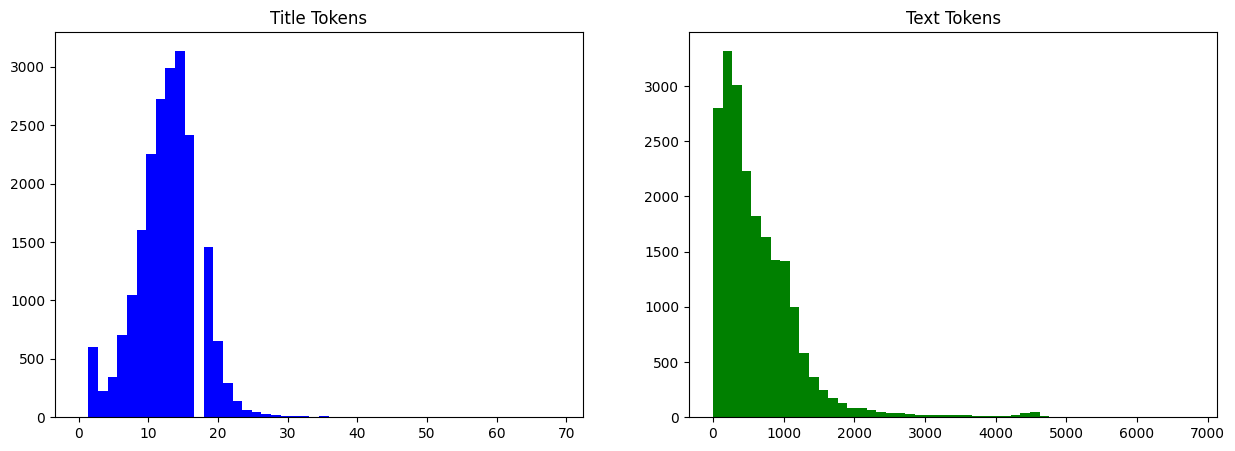

In [38]:
fig, ax = plt.subplots(1,2,figsize=(15,5))
ax[0].hist(dataset['title_tokens'], bins=50, color='blue')
ax[0].set_title("Title Tokens")
ax[1].hist(dataset['text_tokens'], bins=50, color='green')
ax[1].set_title("Text Tokens")


In [39]:
from sklearn.model_selection import train_test_split

In [40]:
train, test = train_test_split(dataset, test_size=0.3, stratify=dataset['label'])
test, validation = train_test_split(test, test_size=1/3, stratify=test['label'])

train.shape, test.shape, validation.shape

((14560, 7), (4160, 7), (2080, 7))

In [41]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14560 entries, 14867 to 9235
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            14560 non-null  int64  
 1   title         14560 non-null  object 
 2   author        13165 non-null  object 
 3   text          14560 non-null  object 
 4   label         14560 non-null  int64  
 5   title_tokens  14560 non-null  float64
 6   text_tokens   14560 non-null  float64
dtypes: float64(2), int64(2), object(3)
memory usage: 910.0+ KB


In [42]:
from datasets import Dataset, DatasetDict

In [43]:
dataset = DatasetDict(
    {
        "train": Dataset.from_pandas(train, preserve_index=False),
        "test": Dataset.from_pandas(test, preserve_index=False),
        "validation": Dataset.from_pandas(validation, preserve_index=False)
    }
)

In [44]:
dataset

DatasetDict({
    train: Dataset({
        features: ['id', 'title', 'author', 'text', 'label', 'title_tokens', 'text_tokens'],
        num_rows: 14560
    })
    test: Dataset({
        features: ['id', 'title', 'author', 'text', 'label', 'title_tokens', 'text_tokens'],
        num_rows: 4160
    })
    validation: Dataset({
        features: ['id', 'title', 'author', 'text', 'label', 'title_tokens', 'text_tokens'],
        num_rows: 2080
    })
})

In [45]:
from transformers import AutoTokenizer

In [46]:
text = "just as test here"

model_dbert = "distilbert-base-uncased"
dbert_tokenizer = AutoTokenizer.from_pretrained(model_dbert)
dbert_tokens = dbert_tokenizer.tokenize(text)

model_mbert = "google/mobilebert-uncased"
mbert_tokenizer = AutoTokenizer.from_pretrained(model_mbert)
mbert_tokens = mbert_tokenizer.tokenize(text)

model_tbert = "huawei-noah/TinyBERT_General_4L_312D"
tbert_tokenizer = AutoTokenizer.from_pretrained(model_tbert)
tbert_tokens = tbert_tokenizer.tokenize(text)

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/847 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/409 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

In [47]:
def tokenize(batch, model='dbert'):
  if model == 'dbert':
    temp = dbert_tokenizer(batch['title'], padding=True, truncation=True)
  elif model == 'mbert':
    temp = mbert_tokenizer(batch['title'], padding=True, truncation=True)
  else:
    temp = tbert_tokenizer(batch['title'], padding=True, truncation=True)
  return temp

In [48]:
encoded_dataset = dataset.map(tokenize, batch_size=None, batched=True)

Map:   0%|          | 0/14560 [00:00<?, ? examples/s]

Map:   0%|          | 0/4160 [00:00<?, ? examples/s]

Map:   0%|          | 0/2080 [00:00<?, ? examples/s]

In [49]:
encoded_dataset

DatasetDict({
    train: Dataset({
        features: ['id', 'title', 'author', 'text', 'label', 'title_tokens', 'text_tokens', 'input_ids', 'attention_mask'],
        num_rows: 14560
    })
    test: Dataset({
        features: ['id', 'title', 'author', 'text', 'label', 'title_tokens', 'text_tokens', 'input_ids', 'attention_mask'],
        num_rows: 4160
    })
    validation: Dataset({
        features: ['id', 'title', 'author', 'text', 'label', 'title_tokens', 'text_tokens', 'input_ids', 'attention_mask'],
        num_rows: 2080
    })
})

In [50]:
from transformers import AutoModel, AutoConfig, AutoModelForSequenceClassification
import torch

label2id = {"Real":0,"Fake": 1}
id2label = {0: "Real",1:"Fake"}

model_dbert = "distilbert-base-uncased"
model_db = AutoModel.from_pretrained(model_dbert)

model_mbert = "google/mobilebert-uncased"
model_mb = AutoModel.from_pretrained(model_mbert)

model_tbert = "huawei-noah/TinyBERT_General_4L_312D"
model_tb = AutoModel.from_pretrained(model_tbert)

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/147M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/147M [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/62.7M [00:00<?, ?B/s]

In [51]:
num_labels = len(label2id)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

config_db = AutoConfig.from_pretrained(model_dbert,label2id=label2id, id2label=id2label)
config_mb = AutoConfig.from_pretrained(model_mbert,label2id=label2id, id2label=id2label)
config_tb = AutoConfig.from_pretrained(model_tbert,label2id=label2id, id2label=id2label)

model_db = AutoModelForSequenceClassification.from_pretrained(model_dbert, config=config_db).to(device)
model_mb = AutoModelForSequenceClassification.from_pretrained(model_mbert, config=config_mb).to(device)
model_tb = AutoModelForSequenceClassification.from_pretrained(model_tbert, config=config_tb).to(device)

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


model.safetensors:   0%|          | 0.00/62.7M [00:00<?, ?B/s]

Some weights of MobileBertForSequenceClassification were not initialized from the model checkpoint at google/mobilebert-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at huawei-noah/TinyBERT_General_4L_312D and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [52]:
model_db.config

DistilBertConfig {
  "_attn_implementation_autoset": true,
  "_name_or_path": "distilbert-base-uncased",
  "activation": "gelu",
  "architectures": [
    "DistilBertForMaskedLM"
  ],
  "attention_dropout": 0.1,
  "dim": 768,
  "dropout": 0.1,
  "hidden_dim": 3072,
  "id2label": {
    "0": "Real",
    "1": "Fake"
  },
  "initializer_range": 0.02,
  "label2id": {
    "Fake": 1,
    "Real": 0
  },
  "max_position_embeddings": 512,
  "model_type": "distilbert",
  "n_heads": 12,
  "n_layers": 6,
  "pad_token_id": 0,
  "qa_dropout": 0.1,
  "seq_classif_dropout": 0.2,
  "sinusoidal_pos_embds": false,
  "tie_weights_": true,
  "transformers_version": "4.48.3",
  "vocab_size": 30522
}

In [53]:
model_mb.config

MobileBertConfig {
  "_attn_implementation_autoset": true,
  "_name_or_path": "google/mobilebert-uncased",
  "architectures": [
    "MobileBertForPreTraining"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_activation": false,
  "classifier_dropout": null,
  "embedding_size": 128,
  "hidden_act": "relu",
  "hidden_dropout_prob": 0.0,
  "hidden_size": 512,
  "id2label": {
    "0": "Real",
    "1": "Fake"
  },
  "initializer_range": 0.02,
  "intermediate_size": 512,
  "intra_bottleneck_size": 128,
  "key_query_shared_bottleneck": true,
  "label2id": {
    "Fake": 1,
    "Real": 0
  },
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "mobilebert",
  "normalization_type": "no_norm",
  "num_attention_heads": 4,
  "num_feedforward_networks": 4,
  "num_hidden_layers": 24,
  "pad_token_id": 0,
  "transformers_version": "4.48.3",
  "trigram_input": true,
  "true_hidden_size": 128,
  "type_vocab_size": 2,
  "use_bottleneck": true,
  "use_bottleneck_attention

In [54]:
model_tb.config

BertConfig {
  "_attn_implementation_autoset": true,
  "_name_or_path": "huawei-noah/TinyBERT_General_4L_312D",
  "attention_probs_dropout_prob": 0.1,
  "cell": {},
  "classifier_dropout": null,
  "emb_size": 312,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 312,
  "id2label": {
    "0": "Real",
    "1": "Fake"
  },
  "initializer_range": 0.02,
  "intermediate_size": 1200,
  "label2id": {
    "Fake": 1,
    "Real": 0
  },
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 4,
  "pad_token_id": 0,
  "position_embedding_type": "absolute",
  "pre_trained": "",
  "structure": [],
  "transformers_version": "4.48.3",
  "type_vocab_size": 2,
  "use_cache": true,
  "vocab_size": 30522
}

In [55]:
from transformers import TrainingArguments

In [56]:
batch_size = 32
training_dir_db = "distilbert_train_dir"
training_dir_mb = "mobilebert_train_dir"
training_dir_tb = "tinybert_train_dir"

In [57]:
import evaluate
import numpy as np

def compute_metrics_evaluate(eval_pred):
  predictions, labels = eval_pred
  predictions = np.argmax(predictions, axis=1)
  return accuracy.compute(predictions=predictions, references=labels)

In [58]:
training_args_db = TrainingArguments(
    output_dir=training_dir_db,
    overwrite_output_dir=True,
    num_train_epochs = 2,
    learning_rate = 2e-5,
    per_device_train_batch_size = batch_size,
    per_device_eval_batch_size = batch_size,
    weight_decay = 0.01,
    eval_strategy = "epoch",
    disable_tqdm = False
)

training_args_mb = TrainingArguments(
    output_dir=training_dir_mb,
    overwrite_output_dir=True,
    num_train_epochs = 2,
    learning_rate = 2e-5,
    per_device_train_batch_size = batch_size,
    per_device_eval_batch_size = batch_size,
    weight_decay = 0.01,
    eval_strategy = "epoch",
    disable_tqdm = False
)

training_args_tb = TrainingArguments(
    output_dir=training_dir_tb,
    overwrite_output_dir=True,
    num_train_epochs = 2,
    learning_rate = 2e-5,
    per_device_train_batch_size = batch_size,
    per_device_eval_batch_size = batch_size,
    weight_decay = 0.01,
    eval_strategy = "epoch",
    disable_tqdm = False
)

In [59]:
from transformers import Trainer

In [60]:
trainer_db = Trainer(
    model=model_db,
    compute_metrics=compute_metrics_evaluate,
    train_dataset=encoded_dataset['train'],
    eval_dataset=encoded_dataset['validation'],
    tokenizer=dbert_tokenizer
)

trainer_mb = Trainer(
    model=model_mb,
    compute_metrics=compute_metrics_evaluate,
    train_dataset=encoded_dataset['train'],
    eval_dataset=encoded_dataset['validation'],
    tokenizer=mbert_tokenizer
)

trainer_tb = Trainer(
    model=model_tb,
    compute_metrics=compute_metrics_evaluate,
    train_dataset=encoded_dataset['train'],
    eval_dataset=encoded_dataset['validation'],
    tokenizer=tbert_tokenizer
)

In [61]:
trainer_db.train()

wandb: WARNING The `run_name` is currently set to the same value as `TrainingArguments.output_dir`. If this was not intended, please specify a different run name by setting the `TrainingArguments.run_name` parameter.
wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter:

 ··········


wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: No netrc file found, creating one.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Currently logged in as: amirerf1998 (amirerf) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


Step,Training Loss
500,0.268600
1000,0.216400
1500,0.201900
2000,0.165500
2500,0.098700
3000,0.118100
3500,0.108100
4000,0.063500
4500,0.033800
5000,0.053300


TrainOutput(global_step=5460, training_loss=0.12513530822027297, metrics={'train_runtime': 626.0854, 'train_samples_per_second': 69.767, 'train_steps_per_second': 8.721, 'total_flos': 1197919244471040.0, 'train_loss': 0.12513530822027297, 'epoch': 3.0})

In [63]:
accuracy = evaluate.load("accuracy")
preds_db_output = trainer_db.predict(encoded_dataset['test'])

In [64]:
preds_db_output

PredictionOutput(predictions=array([[ 4.7387567, -4.8944507],
       [-4.4306693,  4.0465603],
       [ 4.756265 , -4.921609 ],
       ...,
       [ 3.6214836, -3.6613972],
       [ 4.738425 , -4.9057627],
       [ 1.8224329, -1.4767655]], dtype=float32), label_ids=array([0, 1, 0, ..., 0, 0, 1]), metrics={'test_loss': 0.29581978917121887, 'test_accuracy': 0.9449519230769231, 'test_runtime': 12.0304, 'test_samples_per_second': 345.79, 'test_steps_per_second': 43.224})

In [66]:
y_pred = np.argmax(preds_db_output.predictions, axis=1)
y_true = encoded_dataset['test'][:]['label']

In [67]:
from sklearn.metrics import classification_report
print(classification_report(y_true, y_pred, target_names=list(label2id)))

              precision    recall  f1-score   support

        Real       0.95      0.93      0.94      2077
        Fake       0.94      0.96      0.95      2083

    accuracy                           0.94      4160
   macro avg       0.95      0.94      0.94      4160
weighted avg       0.95      0.94      0.94      4160



In [68]:
trainer_db.save_model("distilbert-fake-news-detector")

In [75]:
import zipfile
import os

def zip_folder(folder_path, output_zip):
    # Create a ZipFile object in write mode
    with zipfile.ZipFile(output_zip, 'w', zipfile.ZIP_DEFLATED) as zipf:
        # Walk through the folder and add all files to the zip file
        for root, dirs, files in os.walk(folder_path):
            for file in files:
                zipf.write(os.path.join(root, file), os.path.relpath(os.path.join(root, file), folder_path))

# Example usage
folder_path = '/content/tinybert-fake-news-detector'  # replace with your folder path
output_zip = 'tinybert-fake-news-detector.zip'  # replace with your desired output zip file name
zip_folder(folder_path, output_zip)

print(f"Folder '{folder_path}' has been zipped as '{output_zip}'.")

Folder '/content/tinybert-fake-news-detector' has been zipped as 'tinybert-fake-news-detector.zip'.


In [73]:
trainer_tb.train()

Step,Training Loss
500,0.312800
1000,0.249100
1500,0.236400
2000,0.212300
2500,0.168200
3000,0.155800
3500,0.158900
4000,0.126300
4500,0.097400
5000,0.117300


TrainOutput(global_step=5460, training_loss=0.17634879451094967, metrics={'train_runtime': 132.2092, 'train_samples_per_second': 330.385, 'train_steps_per_second': 41.298, 'total_flos': 129669335228160.0, 'train_loss': 0.17634879451094967, 'epoch': 3.0})

In [74]:
trainer_tb.save_model("tinybert-fake-news-detector")

In [76]:
preds_mb_output = trainer_mb.predict(encoded_dataset['test'])
preds_mb_output

PredictionOutput(predictions=array([[ 13.999304 , -10.045214 ],
       [ -9.8906765,   8.512444 ],
       [ 13.556606 , -10.4396105],
       ...,
       [  4.31499  ,  -2.2686296],
       [ 14.751994 , -11.326744 ],
       [ -0.7012504,   1.8748163]], dtype=float32), label_ids=array([0, 1, 0, ..., 0, 0, 1]), metrics={'test_loss': 0.2664291262626648, 'test_accuracy': 0.9439903846153846, 'test_runtime': 24.2297, 'test_samples_per_second': 171.69, 'test_steps_per_second': 21.461})

In [77]:
y_pred = np.argmax(preds_mb_output.predictions, axis=1)
y_true = encoded_dataset['test'][:]['label']

In [78]:
print(classification_report(y_true, y_pred, target_names=list(label2id)))

              precision    recall  f1-score   support

        Real       0.95      0.94      0.94      2077
        Fake       0.94      0.95      0.94      2083

    accuracy                           0.94      4160
   macro avg       0.94      0.94      0.94      4160
weighted avg       0.94      0.94      0.94      4160



In [79]:
preds_tb_output = trainer_tb.predict(encoded_dataset['test'])
preds_tb_output

PredictionOutput(predictions=array([[ 4.0749407, -3.865758 ],
       [-3.7806616,  3.5878565],
       [ 4.0830946, -3.8745437],
       ...,
       [ 2.9225762, -2.7492318],
       [ 4.078819 , -3.8686876],
       [ 2.8744686, -2.70064  ]], dtype=float32), label_ids=array([0, 1, 0, ..., 0, 0, 1]), metrics={'test_loss': 0.3467043936252594, 'test_accuracy': 0.9264423076923077, 'test_runtime': 3.2191, 'test_samples_per_second': 1292.3, 'test_steps_per_second': 161.538})

In [80]:
y_pred = np.argmax(preds_tb_output.predictions, axis=1)
y_true = encoded_dataset['test'][:]['label']

In [81]:
print(classification_report(y_true, y_pred, target_names=list(label2id)))

              precision    recall  f1-score   support

        Real       0.90      0.96      0.93      2077
        Fake       0.96      0.89      0.92      2083

    accuracy                           0.93      4160
   macro avg       0.93      0.93      0.93      4160
weighted avg       0.93      0.93      0.93      4160

